In [1]:
#install library
#!pip install scikit-learn 
#!pip install matplotlib


In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import os
#print("Matplotlib installed successfully!")

In [22]:
os.listdir()

['.ipynb_checkpoints',
 'car data.csv',
 'Linear Regression.ipynb',
 'Linear_two.ipynb',
 'marital status.csv',
 'nasdaq100.csv',
 'Salary Data.csv']

In [23]:
df=pd.read_csv('nasdaq100.csv',sep=';')
df

,Date,Starting (USD),Ending (USD)
0,01.01.24,16800,16500
1,01.12.23,15900,16100
2,01.11.23,15800,15300
3,01.10.23,16100,16200
4,01.09.23,16300,15700
5,01.08.23,16800,16400
6,01.07.23,15900,16200
7,01.06.23,15800,15500
8,01.05.23,16150,16100
9,01.04.23,16300,15800


In [24]:
#null value check
df.isnull().sum()

Date              0
Starting (USD)    0
Ending (USD)      0
dtype: int64

In [25]:
#Date column delete
## column delete axis=1 , row delete axis=0

df.drop('Date',axis=1)

,Starting (USD),Ending (USD)
0,16800,16500
1,15900,16100
2,15800,15300
3,16100,16200
4,16300,15700
5,16800,16400
6,15900,16200
7,15800,15500
8,16150,16100
9,16300,15800


Text(0.5, 1.0, 'Stock Prices')

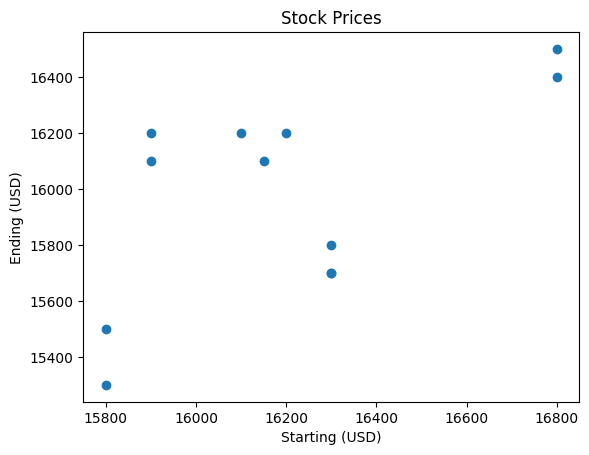

In [26]:

##using matplotlib for graph
plt.scatter(df['Starting (USD)'],df['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('Stock Prices')



In [27]:
x=df[['Starting (USD)']]
x.head()

,Starting (USD)
0,16800
1,15900
2,15800
3,16100
4,16300


In [28]:
y=df[['Ending (USD)']]
y.head()

,Ending (USD)
0,16500
1,16100
2,15300
3,16200
4,15700


### Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
reg = LinearRegression()

Text(0.5, 1.0, 'Stock Prices')

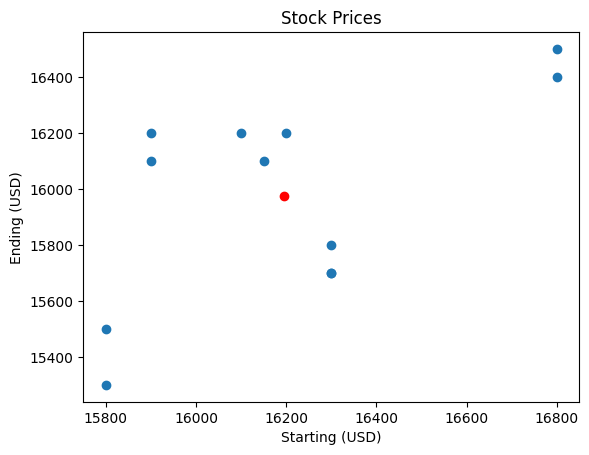

In [31]:
#mean finding and graph..... best fit line go through using mean line
#x.mean(),y.mean()

plt.scatter(x.mean(),y.mean(),color='red')
##using matplotlib for graph
plt.scatter(df['Starting (USD)'],df['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('Stock Prices')


In [32]:
reg.fit(x, y)  #train the model

LinearRegression()

In [33]:

#coef_ (Coefficient) – "Slope"
#It tells you how much the target (output) changes when you change the input (feature).
m=reg.coef_
m

array([[0.65258293]])

In [34]:
#intercept_ (Bias) – "Starting Point"
#It's the value of the target (Y) when the input (X) is zero.
c=reg.intercept_
c

array([5405.87555702])

In [35]:
#law apply ---> y= mx + c

m*16700 + c

array([[16304.0105628]])

In [36]:
reg.predict([[16700]])


C:\Users\New User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[16304.0105628]])

In [38]:
df['predicted_y']=reg.predict(x)
df.drop['Date']
df.head()

TypeError: 'method' object is not subscriptable

Text(0.5, 1.0, 'Stock Prices')

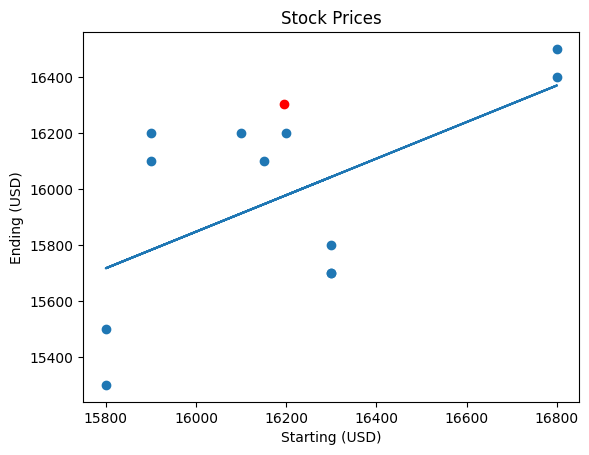

In [19]:
plt.plot(x,reg.predict(x))
#mean finding and graph..... best fit line go through using mean line
#x.mean(),y.mean()

plt.scatter(x.mean(),y.mean(),color='red')
##using matplotlib for graph
plt.scatter(df['Starting (USD)'],df['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('Stock Prices')

### reg.predict() in Simple Terms
##### The .predict() function in scikit-learn is used to make predictions using a trained linear regression model.

### How It Works
##### After training a model (reg.fit(X, y)), you can use reg.predict(X_new) to predict values for new inputs.

In [20]:
import numpy as np
# Sample dataset (House Size in square feet vs. Price in $1000s)
X = np.array([[1000], [1500], [2000], [2500], [3000]])  # House Size (sq ft)
y = np.array([200, 250, 300, 350, 400])  # Price in $1000s

# Train the model
reg = LinearRegression()
reg.fit(X, y)

# Predict price for a 2200 sq ft house
X_new = np.array([[2200]])  # New data
y_pred = reg.predict(X_new) * 1000  # Make prediction

y_pred

array([320000.])